# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy import stats

# Hypotesis testing
# 3. ANOVA test

Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. 

### Task

**significance level = 0.05 (95% confidence)  
goal: check if the plasma etching is significantly different depending on the power used**

### Import data

In [2]:
df = pd.read_excel("files_for_lab/anova_lab_data.xlsx")
df

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [3]:
df.columns

Index(['Power ', 'Etching Rate'], dtype='object')

In [4]:
df.rename(columns={"Power ": "Power"}, inplace=True)

In [5]:
df['Power'].value_counts()

160 W    5
180 W    5
200 W    5
Name: Power, dtype: int64

### Organising data

In [6]:
df['Power'].replace(to_replace=['160 W', '180 W', '200 W'], value=[160, 180, 200], inplace=True)

df160 = df.loc[df['Power']==160]
df160.drop(columns='Power', axis=1, inplace=True)
df160.rename(columns={'Etching Rate':'Power'}, inplace=True)

df180 = df.loc[df['Power']==180]
df180.drop(columns='Power', axis=1, inplace=True)
df180.rename(columns={'Etching Rate':'Power'}, inplace=True)

df200 = df.loc[df['Power']==200]
df200.drop(columns='Power', axis=1, inplace=True)
df200.rename(columns={'Etching Rate':'Power'}, inplace=True)


/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_20572/595245043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df160.drop(columns='Power', axis=1, inplace=True)
/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_20572/595245043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df160.rename(columns={'Etching Rate':'Power'}, inplace=True)
/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_20572/595245043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [7]:
print('Power 160: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df160['Power']), 
                                                                       np.std(df160['Power']),
                                                                       df160['Power'].count()))
print('Power 180: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df180['Power']), 
                                                                       np.std(df180['Power']),
                                                                       df180['Power'].count()))
print('Power 200: mean {:.3f}, standard deviation {:.3f}, samples {}'.format(np.mean(df200['Power']), 
                                                                       np.std(df200['Power']),
                                                                       df200['Power'].count()))

Power 160: mean 5.792, standard deviation 0.286, samples 5
Power 180: mean 6.238, standard deviation 0.388, samples 5
Power 200: mean 8.318, standard deviation 0.599, samples 5


In [8]:
mean_160, std_160, n_160 = np.mean(df160['Power']), np.std(df160['Power']), df160['Power'].count()
mean_180, std_180, n_180 = np.mean(df180['Power']), np.std(df180['Power']), df180['Power'].count()
mean_200, std_200, n_200 = np.mean(df200['Power']), np.std(df200['Power']), df200['Power'].count()

### Checking data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Power', ylabel='Density'>

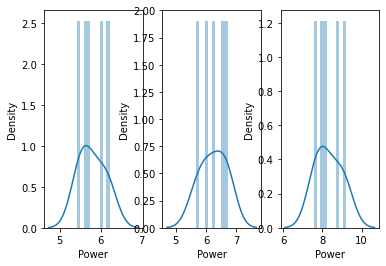

In [9]:
plt.subplot(1, 3, 1)
sns.distplot(df160['Power'], bins=10)

plt.subplot(1, 3, 2)
sns.distplot(df180['Power'], bins=10)

plt.subplot(1, 3, 3)
sns.distplot(df200['Power'], bins=10)

### Define the problem

We are interested in testing the hypothesis that the mean etching between the three samples is statistically the same, or, in other words, that there is statistically no difference between the average beam etching when changin the used power. 
 

**- H0: Them means of all groups are the same**  
H0: µ_160 = µ_180 = µ_200 

**- HA: At least, one of the means is different**  
HA: 


So, the probability of the new mean time being statistically smaller than the old mean time is equal to the idea of finding a t-statistics value more extreme than our critical value. 

- P(µ_160 ≠ µ_180 | µ_160 ≠ µ_200 | µ_180 ≠ µ_200 )
- P(f-critical < f-statistics) 
- P(f-critical < (MSB / MSE))
- P(f-critical < (Mean squares between groups, MSB = SSB / df1) / (Mean squares of errors, MSE = SSE / df2))
- P(f-critical < (∑n_j (X̄_j - X̄)^2 / k - 1) / (∑∑(X- X̄j)^2 / N - k))

### Set up confidence - t-critical value

Determining a t-critical value from the Z distribution. How likely are we to reject the Null Hypotesis when it is actually true (Type I error rate).

- α = Level of significance = P(Type I error) = P(Reject H0 | H0 is true) = 0.05 (95% of confidence)  
- dfn = The numerator degrees of freedom = The numerator degrees of freedom will be the degrees of freedom for whichever sample has the larger variance = n - 1 = 4
- dfd = The denominator degrees of freedom = The denominator degrees of freedom will be the degrees of freedom for whichever sample has the smaller variance = n - 1 = 4
- t-critical = 1.833 (from tables, one tailed test)

In [10]:
alpha = 0.05
dfn = n_160 - 1
dfd = n_200 - 1
f_critical = stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd) 
f_critical

# anova tests or chi-square tests do not use a symetrical distribution like t or z distributions. They are,
# instead, using a f distribution, which is not symetrical, and cannot have a one-tailed option. 

6.388232908695868

### Calculating our t-statistics

In [11]:
f_statistics, p_value = stats.f_oneway(df160['Power'], df180['Power'], df200['Power'])
print(f_statistics, p_value)

36.87895470100505 7.506584272358903e-06


### Results

In [12]:
f_critical < f_statistics

True

In [13]:
p_value < alpha

True

### Conclusions

Our f-statistics is more extreme than the f-critical value, and our p-value is lower than the alpha assigned. So we can reject the null hypothesis, that all the mean etching of the three samples are statisticalle the same.  
